In [626]:
n <- 1200

p1 <- 0.6
p2 <- 0.3
p3 <- 1-p1-p2

e1 <- n*p1
e2 <- n*p2
e3 <- n*(1-p1-p2)

o1 <- 100
o2 <- 100
o3 <- n - o1 - o2

var1 <- n * p1 * (1-p1)
var2 <- n * p2 * (1-p2)
var3 <- n * (1-p1-p2) * (1-(1-p1-p2))

#cov <- -var1 / (2*var2)
cov <- -p1*p2*n # where does this come from?
cov

rho <- cov / (sqrt(var1)*sqrt(var2))
#rho <- -(n * p1 * (1-p1)) / (2 * n * p2 * (1-p2))
rho
chisq.test(x = c(o1, o2, o3), p = c(p1, p2, p3))

[1] -216

[1] -0.8017837


	Chi-squared test for given probabilities

data:  c(o1, o2, o3)
X-squared = 7175, df = 2, p-value < 2.2e-16


In [636]:
((o1-e1)/sqrt((n*p1*(1-p1))))^1 * sqrt(p1*(1-p1))
((o2-e2)/sqrt((n*p2*(1-p2))))^1 * sqrt(p2*(1-p2))
((o3-e3)/sqrt((n*p3*(1-p3))))^1 * sqrt(p3*(1-p3))

[1] -17.89786

[1] -7.505553

[1] 25.40341

In [642]:
((o1-e1)/sqrt((n*p1*(1-p1))) * sqrt(p1*(1-p1)))^2 +
((o2-e2)/sqrt((n*p2*(1-p2))) * sqrt(p2*(1-p2)))^2 +
((o3-e3)/sqrt((n*p3*(1-p3))) * sqrt(p3*(1-p3)))^2

[1] 1022

# Overall formula

$$
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)^2 +
\left(
\frac{
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right) - 
\rho
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)
}{
\sqrt{1-\rho^2}
}\right)^2
$$

# Numerator

### Step 1

$$
\left(
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right) - 
\rho
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)
\right)^2
$$

In [4]:
((o2-e2)/sqrt(var2)-rho*(o1-e1)/sqrt(var1))^2

[1] 2085.813

### Step 2

$$
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right)^2 -
2\rho
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right) + 
\rho^2
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)^2
$$

In [34]:
((o2-e2)/sqrt(var2))^2 -
2*rho*(o1-e1)/sqrt(var1)*(o2-e2)/sqrt(var2) +
rho^2*((o1-e1)/sqrt(var1))^2

[1] 2085.813

### Step 3

$$
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right)^2 -
2\left(\frac{-np_1p_2}{\sqrt{\sigma_1}\sqrt{\sigma_2}}\right)
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right) + 
\left(\frac{-np_1p_2}{\sqrt{\sigma_1}\sqrt{\sigma_2}}\right)^2
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)^2
$$

In [35]:
((o2-e2)/sqrt(var2))^2 -
2*((-p1*p2*n) / (sqrt(var1)*sqrt(var2)))*(o1-e1)/sqrt(var1)*(o2-e2)/sqrt(var2) +
((-p1*p2*n) / (sqrt(var1)*sqrt(var2)))^2*((o1-e1)/sqrt(var1))^2

[1] 2085.813

### Step 4

$$
\frac{\left(o_2-e_2\right)^2}{\sigma_2} +
\frac{2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right)}{\sigma_1\sigma_2} +
\frac{n^2p_1^2p_2^2\left(o_1-e_1\right)^2}{\sigma_1^2\sigma_2}
$$

In [36]:
((o2-e2)^2/var2) + 
(2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) / (var1*var2) +
((n^2*p1^2*p2^2)*(o1-e1)^2) / (var1^2*var2)

[1] 2085.813

### Step 5

$$
\frac{
\sigma_1^2\left(o_2-e_2\right)^2 + 
\sigma_1.2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right) + 
n^2p_1^2p_2^2\left(o_1-e_1\right)^2
}{\sigma_1^2\sigma_2}
$$

In [37]:
(
    var1^2*(o2-e2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-e1)^2
) / 
(var1^2*var2)

[1] 2085.813

# Denominator

### Step 1

$$
1-\rho^2
$$

In [40]:
1-rho^2

[1] 0.3571429

### Step 2

$$
{1-\left(\frac{-np_1p_2}{\sqrt{\sigma_1}\sqrt{\sigma_2}}\right)^2}
$$

In [44]:
1-((-n*p1*p2)/(sqrt(var1)*sqrt(var2)))^2

[1] 0.3571429

### Step 3

$$
{1-\frac{n^2p_1^2p_2^2}{\sigma_1\sigma_2}}
$$

In [46]:
1-((n^2*p1^2*p2^2)/(var1*var2))

[1] 0.3571429

### Step 4

$$
\frac{\sigma_1^2\sigma_2}{\sigma_1^2\sigma_2} -
\frac{n^2p_1^2p_2^2}{\sigma_1\sigma_2}
\\ = 
\frac{\sigma_1^2\sigma_2-\sigma_1n^2p_1^2p_2^2}{\sigma_1^2\sigma_2}
$$

In [50]:
(var1^2*var2-var1*n^2*p1^2*p2^2)/
(var1^2*var2)

[1] 0.3571429

# Combine numerator & denominator

$$
\frac{
\sigma_1^2\left(o_2-np_2\right)^2 + 
\sigma_1.2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right) + 
n^2p_1^2p_2^2\left(o_1-np_1\right)^2
}
{\sigma_1^2\sigma_2-\sigma_1n^2p_1^2p_2^2}
$$

In [53]:
(
    var1^2*(o2-n*p2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-n*p1)^2
) / 
(var1^2*var2-var1*n^2*p1^2*p2^2)

[1] 5840.278

# Return to overall formula

### Step 1

$$
\frac{\left(o_1-e_1\right)^2}{\sigma_1} +
\left(
\frac{
\sigma_1^2\left(o_2-np_2\right)^2 + 
\sigma_1.2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right) + 
n^2p_1^2p_2^2\left(o_1-np_1\right)^2
}
{\sigma_1^2\sigma_2-\sigma_1n^2p_1^2p_2^2}
\right)
$$

In [55]:
(o1-e1)^2 / var1 + 
(
    var1^2*(o2-n*p2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-n*p1)^2
) / 
(var1^2*var2-var1*n^2*p1^2*p2^2)

[1] 7175

### Step 2

$$
\frac{\left(o_1-e_1\right)^2}{np_1} -
\frac{(1-p_1)-1}{(1-p_1)} *
\frac{\left(o_1-e_1\right)^2}{(np_1)} +
\left(
\frac{
\sigma_1^2\left(o_2-np_2\right)^2 + 
\sigma_1.2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right) + 
n^2p_1^2p_2^2\left(o_1-np_1\right)^2
}
{\sigma_1^2\sigma_2-\sigma_1n^2p_1^2p_2^2}
\right)
$$

In [56]:
((o1-e1)^2 / (n*p1)) - (((1-p1)-1)/(1-p1))*((o1-e1)^2/(n*p1)) +
(
    var1^2*(o2-n*p2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-n*p1)^2
) / 
(var1^2*var2-var1*n^2*p1^2*p2^2)

[1] 7175

### Step 3

$$
\frac{\left(o_1-e_1\right)^2}{np_1} +
\frac{p_1\left(o_1-e_1\right)^2}{np_1(1-p_1)} +
\left(
\frac{
\sigma_1^2\left(o_2-np_2\right)^2 + 
\sigma_1.2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right) + 
n^2p_1^2p_2^2\left(o_1-np_1\right)^2
}
{\sigma_1^2\sigma_2-\sigma_1n^2p_1^2p_2^2}
\right)
$$

In [57]:
((o1-e1)^2 / (e1)) +
(p1*(o1-e1)^2) / (var1) +
(
    var1^2*(o2-n*p2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-n*p1)^2
) / 
(var1^2*var2-var1*n^2*p1^2*p2^2)

[1] 7175

### Step 4

$$
\frac{\left(o_1-e_1\right)^2}{e_1} +
\frac{p_1\left(o_1-e_1\right)^2}{\sigma_1} +
\left(
\frac{
\sigma_1^2\left(o_2-np_2\right)^2 + 
\sigma_1.2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right) + 
n^2p_1^2p_2^2\left(o_1-np_1\right)^2
}
{\sigma_1^2\sigma_2-\sigma_1n^2p_1^2p_2^2}
\right)
$$

In [58]:
((o1-e1)^2 / (e1)) +
(p1*(o1-e1)^2) / (var1) +
(
    var1^2*(o2-n*p2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-n*p1)^2
) / 
(var1^2*var2-var1*n^2*p1^2*p2^2)

[1] 7175

### Step 5

$$
\frac{\left(o_1-e_1\right)^2}{e_1} +
\left(
\frac{
p_1\left(o_1-e_1\right)^2\left(\sigma_1\sigma_2-n^2p_1^2p_2^2\right) +
\sigma_1^2\left(o_2-np_2\right)^2 + 
\sigma_1.2np_1p_2\left(o_1-np_1\right)\left(o_2-np_2\right) + 
n^2p_1^2p_2^2\left(o_1-np_1\right)^2
}
{\sigma_1^2\sigma_2-\sigma_1n^2p_1^2p_2^2}
\right)
$$

In [62]:
((o1-e1)^2 / (e1)) +
(
    (p1*(o1-e1)^2) * (var1*var2-n^2*p1^2*p2^2) +
    var1^2*(o2-n*p2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-n*p1)^2
) / 
(var1^2*var2-var1*n^2*p1^2*p2^2)

[1] 7175

In [63]:
    var1^2*(o2-e2)^2 +
    (var1*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-e1)^2

[1] 43597440000

In [66]:
    (n*p1*(1-p1))^2*(o2-n*p2)^2 +
    (n*p1*(1-p1)*2*n*p1*p2*(o1-n*p1)*(o2-n*p2)) +
    (n^2*p1^2*p2^2)*(o1-n*p1)^2

[1] 43597440000

In [68]:
n^4*p1^2*p2^2+2*n^3*p1^3*o2*p2+(-2)*n^3*p1^2*o2*p2-2*n^3*p1^2*p2^2*o1+n^2*p1^4*o2^2+(-2)*n^2*p1^3*o2^2-2*n^2*p1^3*o2*p2*o1+n^2*p1^2*o2^2+2*n^2*p1^2*o2*p2*o1+n^2*p1^2*p2^2*o1^2

[1] 43597440000

In [69]:
n^4 * p1^2 + 2 * n^3 * p1^3 * o2 * p2 + n^2 * p1^4 * o2^2 - 2 * n^2 * p1^3 * o2^2 - 2 * n^2 * p1^3 * o2 * p2 * o1 + n^2 * p1^2 * o2^2 + 2 * n^2 * p1^2 * o2 * p2 * o1 + n^2 * p1^2 * p2^2 * o1^2

[1] 7.71431e+11

In [70]:
n^2 * (p1 + p2)^2 * (n + o2)

[1] 1516320000

<font color='red'>
    $$

\chi^2 = 
\frac{\left(o_1-e_1\right)^2}{np_1} +
\frac{\left(o_1-e_1\right)^2}{n(1-p_1)} +
\left(
\frac{
\left(\frac{o_3-e_3}{\sqrt{\sigma_3}}\right) - 
\rho_\left({1,3}\right)
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)
}{
\sqrt{1-\rho_\left({1,3}\right)^2}
}\right)^2
$$
</font>

$$
\chi^2 = 
\frac{\left(o_1-e_1\right)^2}{np_1} +
\frac{\left(o_1-e_1\right)^2}{n(1-p_1)} +
\left(
\frac{
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right) - 
\rho_\left({1,2}\right)
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right)
}{
\sqrt{1-\rho_\left({1,2}\right)^2}
}\right)^2
$$

$$
\chi^2 = 
\frac{\left(o_2-e_2\right)^2}{np_2} +
\frac{\left(o_2-e_2\right)^2}{n(1-p_2)} +
\left(
\frac{
\left(\frac{o_3-e_3}{\sqrt{\sigma_3}}\right) - 
\rho_\left({2,3}\right)
\left(\frac{o_2-e_2}{\sqrt{\sigma_2}}\right)
}{
\sqrt{1-\rho_\left({2,3}\right)^2}
}\right)^2
$$

$$
\chi^2 = 
\frac{\left(o_3-e_3\right)^2}{np_3} +
\frac{\left(o_3-e_3\right)^2}{n(1-p_3)} +
\left(
\frac{
\left(\frac{o_1-e_1}{\sqrt{\sigma_1}}\right) - 
\rho_\left({1,3}\right)
\left(\frac{o_3-e_3}{\sqrt{\sigma_3}}\right)
}{
\sqrt{1-\rho_\left({1,3}\right)^2}
}\right)^2
$$

$$
\chi^2 = 
\frac{\left(o_1-e_1\right)^2}{np_1} +
\frac{\left(o_2-e_2\right)^2}{np_2} +
\frac{\left(o_3-e_3\right)^2}{np_3}
$$

In [ ]:
# 1 + 2 + 3
# 2 + 2.5 + 1.5
# 3 + 0.7 + 2.3

In [6]:
a <- p1
b <- p2
c <- p3

X <- o1
Y <- o2
Z <- o3

In [11]:
(X-(n*a))^2 / (n*a*(1-a)) 
(Y-(n*b))^2 / (n*b*(1-b)) 
(Z-(n*c))^2 / (n*c*(1-c))

[1] 1334.722

[1] 268.254

[1] 7170.37

In [17]:
(X-(n*a))^2 / (n*a) +
(X-(n*a))^2 / (n*(1-a)) 

(n-Y-Z-(n*(1-b-c)))^2 / (n*(1-b-c)*(1-(1-b-c))) 

(X-(n*a))^2 / (n*a) + (Y-(n*b))^2 / (n*b) + (Z-(n*c))^2 / (n*c)

[1] 1334.722

[1] 1334.722

[1] 7175

In [18]:
(n*(1-b-c)*(1-(1-b-c))) 
(n * (1 - b - c) * (b + c))

[1] 288

[1] 288

In [19]:
(n - Y - Z - (n * (1 - b - c)))^2
((-Y - Z + n * b + n * c))^2

[1] 384400

[1] 384400

In [20]:
(X - (n * a))^2 * (1 / (n * a) + 1 / (n * (1 - a))) 
(-Y - Z + n * b + n * c)^2 / (n * (1 - b - c) * (b + c))



[1] 1334.722

[1] 1334.722

In [21]:
(X - (n * a))^2 / (n * a) + (X - (n * a))^2 / (n * (1 - a)) 
(-Y - Z + n * b + n * c)^2 / (n * (1 - b - c) * (b + c))

[1] 1334.722

[1] 1334.722

In [22]:
(X - (n * a))^2 / (n * a) + (X - (n * a))^2 / (n * (1 - a)) 
(-Y - Z + n * b + n * c)^2 / (n * (1 - b - c) * (b + c))

[1] 1334.722

[1] 1334.722

In [27]:
(X-(n*a))^2 / (n*a) + (Y-(n*b))^2 / (n*b) + (Z-(n*c))^2 / (n*c) 
n*(b+c)*(a+c)*(a+b) * ((n-Y-Z)/n)^2 / (a*b*c*(b+c)) - (X-(n*a))^2 * (b+c) / (a*b*c*(b+c))

[1] 7175

[1] -21355264

In [29]:
(9-4)^2

(9-(7*4))^2

[1] 25

[1] 361

In [30]:
# (a-b)^2
# a^2 -2ab + b^2

# (a-cb)^2
# a^2 -2abc + c^2b^2

In [31]:
25+(2*9*4)-(2*9*4*7)-4^2+(7^2*4^2)

[1] 361

In [35]:
(o1-e1)^2/e1 + (o2-e2)^2/e2 + (o3-e3)^2/e3
(o1-e1)^2/e1
(o2-e2)^2/e2
(o3-e3)^2/e3

[1] 7175

[1] 533.8889

[1] 187.7778

[1] 6453.333

In [40]:
(o1-e1)^2/(n*p1*(1-p1))
(o1-e1)^2/(n*p1) + (o1-e1)^2/(n*(1-p1))

[1] 1334.722

[1] 1334.722

In [41]:
533.888888888889 / 1334.72222222222

[1] 0.4

In [42]:
p1

[1] 0.6

In [43]:
# chi^2 = z1 * (1-p1) + z2 * (1-p2) + z3 * (1-p3)

In [52]:
print('Za')
Za <- (o1-e1)^2/(n*p1*(1-p1))
Za
print('Zb')
Zb <- (o2-e2)^2/(n*p2*(1-p2))
Zb
print('Zc')
Zc <- (o3-e3)^2/(n*p3*(1-p3))
Zc
print('Za.prime')
Za.prime <- (o1-e1)^2/(n*p1)
Za.prime
print('Zb.prime')
Zb.prime <- (o2-e2)^2/(n*p2)
Zb.prime
print('Zc.prime')
Zc.prime <- (o3-e3)^2/(n*p3)
Zc.prime

[1] "Za"


[1] 1334.722

[1] "Zb"


[1] 268.254

[1] "Zc"


[1] 7170.37

[1] "Za.prime"


[1] 533.8889

[1] "Zb.prime"


[1] 187.7778

[1] "Zc.prime"


[1] 6453.333

In [57]:
Zc/Za
Zc.prime/Za.prime
Za.prime/Za
Zb.prime/Zb
Zc.prime/Zc

[1] 5.372182

[1] 12.08741

[1] 0.4

[1] 0.7

[1] 0.9

In [54]:
Za*(1-p1)+Zb*(1-p2)+Zc*(1-p3)
Za.prime + Zb.prime + Zc.prime

[1] 7175

[1] 7175

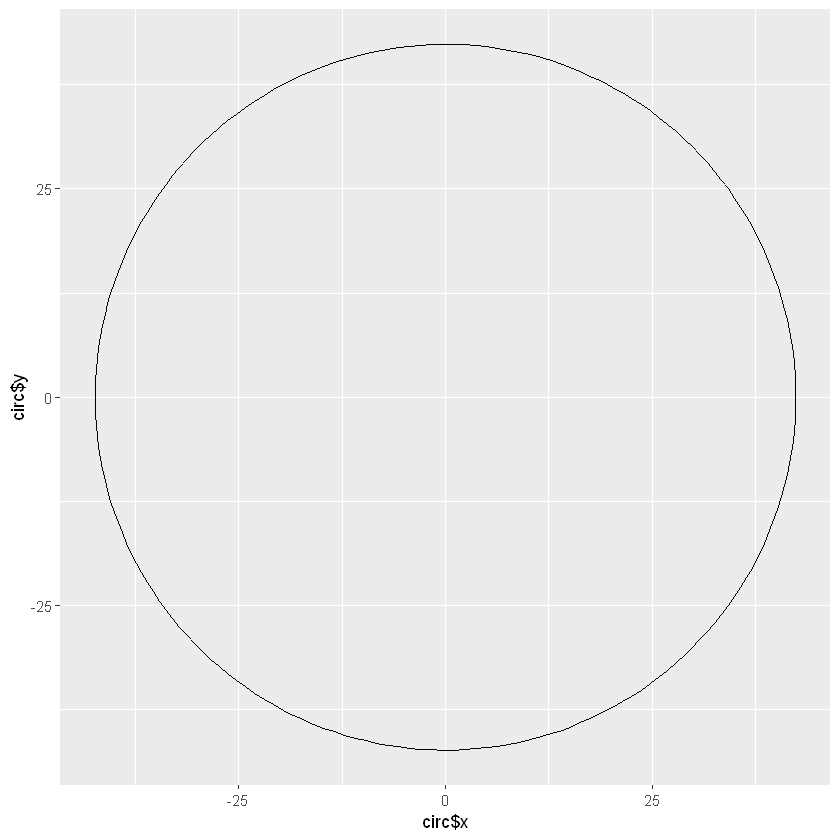

In [193]:
library(tidyverse)
library(scales)
library(stringr)

get_circle_coords <- function(r = sqrt(7175)/2, ...) {
  data_frame(theta = seq(0, 2 * pi, ...),
             x     = cos(theta) * r,
             y     = sin(theta) * r)
}

circ <- get_circle_coords(length.out = 200)
p <- qplot(circ$x, circ$y, geom = "path")
p

In [214]:
#circ %>% tail()
alpha.Za <- acos(x = sqrt(Za) / sqrt(7175))
alpha.Za.x <- sqrt(7175)/2 - cos(alpha.Za) * sqrt(Za)
alpha.Za.y <- sin(alpha.Za) * sqrt(Za)


alpha.Zb <- acos(x = sqrt(Zb) / sqrt(7175))
alpha.Zb.x <- sqrt(7175)/2 - cos(alpha.Zb) * sqrt(Zb)
alpha.Zb.y <- sin(alpha.Zb) * sqrt(Zb)


alpha.Zc <- acos(x = sqrt(Zc) / sqrt(7175))
alpha.Zc.x <- sqrt(7175)/2 - cos(alpha.Zc) * sqrt(Zc)
alpha.Zc.y <- sin(alpha.Zc) * sqrt(Zc)

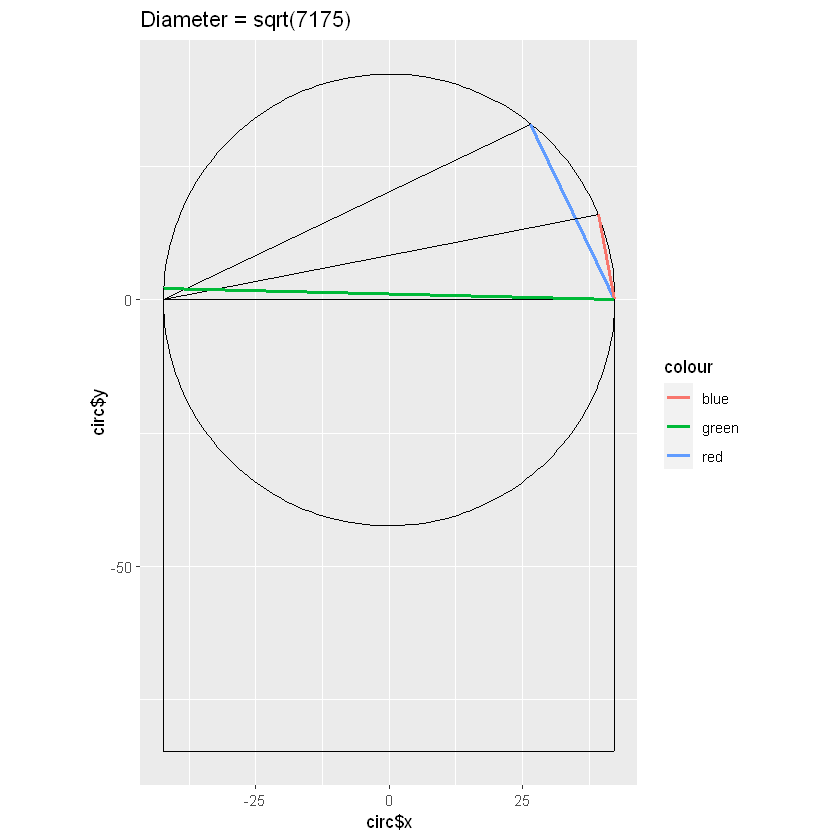

In [223]:
p +
geom_segment(aes(x = -sqrt(7175)/2, y = 0, xend = sqrt(7175)/2, yend = 0)) +
geom_segment(aes(x = -sqrt(7175)/2, y = 0, xend = -sqrt(7175)/2, yend = -sqrt(7175))) +
geom_segment(aes(x = -sqrt(7175)/2, y = -sqrt(7175), xend = sqrt(7175)/2, yend = -sqrt(7175))) +
geom_segment(aes(x = sqrt(7175)/2, y = -sqrt(7175), xend = sqrt(7175)/2, yend = 0)) +

geom_segment(aes(x = sqrt(7175)/2, y = 0, xend = alpha.Za.x, yend = alpha.Za.y, color = 'red'), size=1) +
geom_segment(aes(x = -sqrt(7175)/2, y = 0, xend = alpha.Za.x, yend = alpha.Za.y)) +

geom_segment(aes(x = sqrt(7175)/2, y = 0, xend = alpha.Zb.x, yend = alpha.Zb.y, color = 'blue'), size=1) +
geom_segment(aes(x = -sqrt(7175)/2, y = 0, xend = alpha.Zb.x, yend = alpha.Zb.y)) +

geom_segment(aes(x = sqrt(7175)/2, y = 0, xend = alpha.Zc.x, yend = alpha.Zc.y, color = 'green'), size=1) +
geom_segment(aes(x = -sqrt(7175)/2, y = 0, xend = alpha.Zc.x, yend = alpha.Zc.y)) +
coord_equal() + 
ggtitle("Diameter = sqrt(7175)") 

In [147]:
x <- 7175/2-alpha.Za.x
x
y <- alpha.Za.y
y
sqrt(x^2+y^2)

[1] 62.61909

[1] 667.3611

[1] 670.2925

In [146]:
x <- alpha.Zc.x + 7175/2
x
y <- alpha.Zc.y
y
sqrt(x^2+y^2)

[1] 3716.354

[1] 3585.185

[1] 5163.801

In [149]:
alpha.Za.x

[1] 3524.881

In [128]:
7175/2

[1] 3587.5

In [129]:
sqrt(7175/2)

[1] 59.89574

In [132]:
alpha.Za <- acos(x = Za / 7175)
alpha.Za/2/pi*360
alpha.Za.x <- cos(alpha.Za) * 7175/2
alpha.Za.y <- sin(alpha.Za) * 7175/2

[1] 79.27916

In [140]:
cos(alpha.Za)

[1] 0.186024

In [138]:
acos(Za/7175)
cos(1.38368237268488)

[1] 1.383682

[1] 0.186024

In [141]:
alpha.Za.y

[1] 3524.881

In [155]:
sin(alpha.Za) * Za

[1] 1311.425

In [170]:
alpha.Za.x
alpha.Za.y

[1] 248.2904

[1] 1311.425

In [158]:
sin(alpha.Za) * 7175/2

[1] 3524.881

In [159]:
Za

[1] 1334.722

In [179]:
sqrt(5^2-3.5^2)

[1] 3.570714

In [196]:
sqrt(7175^2-1334.72222222222^2)
1334.72222222222/7049.7618108349

[1] 7049.762

[1] 0.1893287

In [225]:
sqrt(Za^2+Za.prime^2)

[1] 1437.54

In [251]:
length <- sqrt(Za)
length/100
length.other <- sqrt(7175-length^2)
length.other/100

length^2+length.other^2

sqrt(Za*(1-p1))/100

[1] 0.3653385

[1] 0.7642171

[1] 7175

[1] 0.2310604

In [263]:
Za
Zb

[1] 1334.722

[1] 268.254

In [264]:
Za/Zb

[1] 4.975592

In [265]:
Za
(1-p1)*Za + p1*Za


[1] 1334.722

[1] 1334.722

In [269]:
(1-p1)*Za^2  + 7175^2 - (1-p1)*Za^2

[1] 51480625

In [268]:
7175^2

[1] 51480625

In [278]:
Za^2+p1*Za^2 +
Zb^2+p2*Zb^2 +
Zc^2+p3*Zc^2

[1] 59499554

In [279]:
(1-p1)*Za + (1-p2)*Zb+ (1-p3)*Zc

[1] 7175

In [285]:
(1-p1)*Za + (p1)*Za + (7175 - Za)
(1-p1)*Za + (p1)*Za + (7175 - (1-p1)*Za - (p1)*Za)
(1-p1)*Za + (7175 - (1-p1)*Za)
(1-p1)*Za + (7175 -Za + p1*Za)

[1] 7175

[1] 7175

[1] 7175

[1] 7175

In [286]:
-Za + p1*Za +
-Zb + p2*Zb +
-Zc + p3*Zc

[1] -7175

In [295]:
a <- sqrt(Zc)
a
h <- sqrt(7175)
acos(a/h) * 180 / pi

[1] 84.67804

[1] 1.455565

In [296]:
64.4+78.9+1.5

[1] 144.8

In [298]:
acos(sqrt(Za)/h) * 180 / pi +
acos(sqrt(Zb)/h) * 180 / pi +
acos(sqrt(Zc)/h) * 180 / pi

[1] 144.7563

In [304]:
l.a <- sqrt(Za)
l.h <- sqrt(7175)
l.o <- sqrt(l.h^2-l.a^2)

triangle.area <- (l.a * l.o) / 2
triangle.height <- 2 * triangle.area / l.h

[1] 1395.99

[1] 32.96107

[1] 1395.99

In [309]:
print('Za')
Za <- sqrt((o1-e1)^2/(n*p1*(1-p1)))
Za
print('Zb')
Zb <- sqrt((o2-e2)^2/(n*p2*(1-p2)))
Zb
print('Zc')
Zc <- sqrt((o3-e3)^2/(n*p3*(1-p3)))
Zc
print('Za.prime')
Za.prime <- sqrt(7175-Za^2)
Za.prime
print('Zb.prime')
Zb.prime <- sqrt(7175-Zb^2)
Zb.prime
print('Zc.prime')
Zc.prime <- sqrt(7175-Zc^2)
Zc.prime

[1] "Za"


[1] 36.53385

[1] "Zb"


[1] 16.37846

[1] "Zc"


[1] 84.67804

[1] "Za.prime"


[1] 76.42171

[1] "Zb.prime"


[1] 83.10684

[1] "Zc.prime"


[1] 2.151657

In [314]:
Za^2+Za.prime^2
Zb^2+Zb.prime^2
Zc^2+Zc.prime^2

[1] 7175

[1] 7175

[1] 7175

In [324]:
Za^2*(1-p1) + Za^2*p1 + Za.prime^2   #1
Zb^2*(1-p2) + Zb^2*p2 + Zb.prime^2   #2
Zc^2*(1-p3) + Zc^2*p3 + Zc.prime^2   #3

Za^2*(1-p1) + Za.prime^2*(1-p1)   #4
Zb^2*(1-p2) + Zb.prime^2*(1-p2)   #5
Zc^2*(1-p3) + Zc.prime^2*(1-p3)   #6

[1] 7175

[1] 7175

[1] 7175

[1] 2870

[1] 5022.5

[1] 6457.5

In [331]:
Za^2*(1-p1) + Za^2*p1 + Za.prime^2   +
Zb^2*(1-p2) + Zb^2*p2 + Zb.prime^2   +
Zc^2*(1-p3) + Zc^2*p3 + Zc.prime^2   -

(Za^2*(1-p1) + Za.prime^2*(1-p1))   -
(Zb^2*(1-p2) + Zb.prime^2*(1-p2))   -
(Zc^2*(1-p3) + Zc.prime^2*(1-p3))   

[1] 7175

In [332]:
Za^2*p1 + Za.prime^2   +
Zb^2*p2 + Zb.prime^2   +
Zc^2*p3 + Zc.prime^2   -

(Za.prime^2*(1-p1))   -
(Zb.prime^2*(1-p2))   -
(Zc.prime^2*(1-p3))   

[1] 7175

In [334]:
Za^2*p1 + p1*Za.prime^2   +
Zb^2*p2 + p2*Zb.prime^2   +
Zc^2*p3 + p3*Zc.prime^2 

[1] 7175

In [335]:
p1*(Za^2 + Za.prime^2)   +
p2*(Zb^2 + Zb.prime^2)   +
p3*(Zc^2 + Zc.prime^2)   

[1] 7175

In [348]:
Za^2*(1-p1) +
Zb^2*(1-p2) +
Zc^2*(1-p3) 

[1] 7175

In [357]:
Za^2 + Zb^2 + Zc^2
p1*Za.prime^2 + p2*Zb.prime^2 + p3*Zc.prime^2

[1] 8773.347

[1] 5576.653

In [361]:
p1*Za^2 + Za.prime^2 +
p2*Zb^2 + Zb.prime^2 +
p3*Zc^2 + Zc.prime^2 

(Za^2*(1-p1) + Za.prime^2*(1-p1))   +
(Zb^2*(1-p2) + Zb.prime^2*(1-p2))   +
(Zc^2*(1-p3) + Zc.prime^2*(1-p3))   

[1] 14350

[1] 14350

In [375]:
2*p1*Za^2  +
2*p2*Zb^2  +
2*p3*Zc^2  

Za^2 - Za.prime^2*p1   +
Zb^2 - Zb.prime^2*p2   +
Zc^2 - Zc.prime^2*p3  

[1] 3196.693

[1] 3196.693

In [377]:
2*p1*Za^2  + Za.prime^2*p1  +
2*p2*Zb^2  + Zb.prime^2*p2 +
2*p3*Zc^2  + Zc.prime^2*p3 

Za^2  +
Zb^2  +
Zc^2  

[1] 8773.347

[1] 8773.347

In [381]:
p1*Za^2 + p1*Za^2  + Za.prime^2*p1  +
p2*Zb^2 + p2*Zb^2  + Zb.prime^2*p2 +
p3*Zc^2 + p3*Zc^2  + Zc.prime^2*p3 

Za^2  +
Zb^2  +
Zc^2  

[1] 8773.347

[1] 8773.347

In [382]:
p1*Za^2 + 
p2*Zb^2 + 
p3*Zc^2 + 7175 

Za^2  +
Zb^2  +
Zc^2 

[1] 8773.347

[1] 8773.347

In [383]:
###########################################################
###
###
### THIS IS THE IDENTITY I'M MISSING
###
### NO -> THIS IS THE CHI^2 TEST STAT
### Za^2  - p1*Za^2 = Za^2(1-p1)
###
###########################################################
7175 

Za^2  - p1*Za^2 + 
Zb^2  - p2*Zb^2 + 
Zc^2  - p3*Zc^2 

[1] 7175

[1] 7175

In [384]:
7175 +
7175 +
7175

Za^2/p1  - Za^2 + 
Zb^2/p2  - Zb^2 + 
Zc^2/p3  - Zc^2 

[1] 21525

[1] 66049.07

In [386]:
p1*7175 + p2*7175 + p3*7175

[1] 7175

In [387]:
p1*(Za^2  - p1*Za^2) + 
p2*(Zb^2  - p2*Zb^2) + 
p3*(Zc^2  - p3*Zc^2) 

[1] 1022

In [390]:
2*Za^2*p1 + 2*p1*Za.prime^2   +
2*Zb^2*p2 + 2*p2*Zb.prime^2   +
2*Zc^2*p3 + 2*p3*Zc.prime^2 

Za^2*(1-p1) + Za.prime^2*(1-p1)   +
Zb^2*(1-p2) + Zb.prime^2*(1-p2)   +
Zc^2*(1-p3) + Zc.prime^2*(1-p3)   #6

[1] 14350

[1] 14350

In [396]:
3*Za^2*p1 + 3*p1*Za.prime^2   +
3*Zb^2*p2 + 3*p2*Zb.prime^2   +
3*Zc^2*p3 + 3*p3*Zc.prime^2 

Za^2 + Za.prime^2   +
Zb^2 + Zb.prime^2   +
Zc^2 + Zc.prime^2   

[1] 21525

[1] 21525

In [408]:
Za^2 + Zb^2 + Zc^2
Za.prime^2 + Zb.prime^2 + Zc.prime^2

[1] 8773.347

[1] 12751.65

In [409]:
12751.6534391534 / 8773.34656084656

[1] 1.453454

In [410]:
Za^2*(1-p1) + Zb^2*(1-p2) + Zc^2*(1-p3)
Za.prime^2*(1-p1) + Zb.prime^2*(1-p2) + Zc.prime^2*(1-p3)

[1] 7175

[1] 7175

In [402]:
90.6799602552111 / 102.288698025499

[1] 0.8865101

In [411]:
Za^2*(p1) + Zb^2*(p2) + Zc^2*(p3)
Za.prime^2*(p1) + Zb.prime^2*(p2) + Zc.prime^2*(p3)

[1] 1598.347

[1] 5576.653

In [412]:
5576.65343915344 / 1598.34656084656

[1] 3.489014

In [413]:
(Za.prime^2*(1-p1)) / (Za^2*(1-p1))

[1] 4.37565

In [414]:
p1*(Za^2 + Za.prime^2)   +
p2*(Zb^2 + Zb.prime^2)   +
p3*(Zc^2 + Zc.prime^2)   

[1] 7175

In [420]:
Za^2 - (1-p1)*Za^2 + Za.prime^2 - (1-p1)*Za.prime^2 +
Zb^2 - (1-p2)*Zb^2 + Zb.prime^2 - (1-p2)*Zb.prime^2 +
Zc^2 - (1-p3)*Zc^2 + Zc.prime^2 - (1-p3)*Zc.prime^2 

[1] 7175

In [423]:
3*7175 - (1-p1)*Za^2 - (1-p1)*Za.prime^2 +
(1-p2)*Zb^2 - (1-p2)*Zb.prime^2 +
(1-p3)*Zc^2 - (1-p3)*Zc.prime^2 

[1] 20457.22

In [422]:
Za^2+ Za.prime^2  +
Zb^2  + Zb.prime^2 +
Zc^2  + Zc.prime^2 

[1] 21525

In [425]:
(1-p1)*Za^2 - (1-p1)*Za.prime^2 +
(1-p2)*Zb^2 - (1-p2)*Zb.prime^2 +
(1-p3)*Zc^2 - (1-p3)*Zc.prime^2 

[1] -2.273737e-12

In [426]:
(1-p1)*Za^2  +
(1-p2)*Zb^2  +
(1-p3)*Zc^2 

(1-p1)*Za.prime^2 +
(1-p2)*Zb.prime^2 +
(1-p3)*Zc.prime^2 

[1] 7175

[1] 7175

In [428]:
#2*[9] = [8]
2*(p1*(Za^2 + Za.prime^2)   +
p2*(Zb^2 + Zb.prime^2)   +
p3*(Zc^2 + Zc.prime^2)  
   )

(Za^2*(1-p1) + Za.prime^2*(1-p1))   +
(Zb^2*(1-p2) + Zb.prime^2*(1-p2))   +
(Zc^2*(1-p3) + Zc.prime^2*(1-p3))   

[1] 14350

[1] 14350

In [431]:
3*(p1*(Za^2 + Za.prime^2)   +
p2*(Zb^2 + Zb.prime^2)   +
p3*(Zc^2 + Zc.prime^2)  
   )

Za^2 + Za.prime^2   +
Zb^2 + Zb.prime^2   +
Zc^2 + Zc.prime^2  

[1] 21525

[1] 21525

In [434]:
p1*Za^2 + Za.prime^2   +
p2*Zb^2 + Zb.prime^2  +
p3*Zc^2 + Zc.prime^2 

(Za^2*(1-p1) + Za.prime^2*(1-p1))   +
(Zb^2*(1-p2) + Zb.prime^2*(1-p2))   +
(Zc^2*(1-p3) + Zc.prime^2*(1-p3)) 

[1] 14350

[1] 14350

In [436]:
p1*Za^2    +
p2*Zb^2   +
p3*Zc^2 

(Za^2*(1-p1) + Za.prime^2*(0-p1))   +
(Zb^2*(1-p2) + Zb.prime^2*(0-p2))   +
(Zc^2*(1-p3) + Zc.prime^2*(0-p3)) 

[1] 1598.347

[1] 1598.347

In [439]:
2*p1*Za^2    +
2*p2*Zb^2   +
2*p3*Zc^2 

Za^2 + Za.prime^2*(0-p1)   +
Zb^2 + Zb.prime^2*(0-p2)  +
Zc^2 + Zc.prime^2*(0-p3)

[1] 3196.693

[1] 3196.693

In [440]:
2*p1*Za^2 + p1*Za.prime^2 + Za.prime

[1] 5182.255

In [441]:
2*p1*Za^2 
Za^2 + Za.prime^2*(0-p1) 

[1] 1601.667

[1] -2169.444

In [444]:
(2/3)*Za^2 + (2/3)*Za.prime^2 +
(2/3)*Zb^2 + (2/3)*Zb.prime^2 +
(2/3)*Zc^2 + (2/3)*Zc.prime^2 

[1] 14350

In [446]:
(1-2*p1)*Za^2  +
(1-2*p2)*Zb^2  +
(1-2*p3)*Zc^2  -


(p1)*Za.prime^2 -
(p2)*Zb.prime^2 -
(p3)*Zc.prime^2 

[1] -1.819211e-12

In [448]:
(1-2*p1)*Za^2  +
(1-2*p2)*Zb^2  +
(1-2*p3)*Zc^2  -


(p1)*Za.prime^2 -
(p2)*Zb.prime^2 -
(p3)*Zc.prime^2 

[1] -1.819211e-12

In [450]:
p1*Za^2 +
p2*Zb^2 +
p3*Zc^2

[1] 1598.347

In [451]:
sqrt(1598)

[1] 39.97499

In [453]:
(Za+Zb+Zc)/3

[1] 45.86345

In [454]:
p1*Za.prime^2 +
p2*Zb.prime^2 +
p3*Zc.prime^2

[1] 5576.653

In [455]:
alpha <- acos(Za/sqrt(7175))
alpha

[1] 1.124858

In [458]:
sin(alpha)
Za.prime/sqrt(7175)

[1] 0.9022062

[1] 0.9022062

In [459]:
7175 * (sin(acos(Za/sqrt(7175))))^2 + Za^2

[1] 7175

In [483]:
((1-p1)*Za^2 + (1-p2)*Zb^2 + (1-p3)*Zc^2) /
((1-p1)*Za.prime^2 + (1-p2)*Zb.prime^2 + (1-p3)*Zc.prime^2)

((p1)*Za^2 + (p2)*Zb^2 + (p3)*Zc^2) /
((p1)*Za.prime^2 + (p2)*Zb.prime^2 + (p3)*Zc.prime^2)

print('surprising')
((p1)*Za^2 + (p2)*Zb^2 + (p3)*Zc^2) /
((1-p1)*Za^2 + (1-p2)*Zb^2 + (1-p3)*Zc^2)

((p1)*Za.prime^2 + (p2)*Zb.prime^2 + (p3)*Zc.prime^2) /
((1-p1)*Za.prime^2 + (1-p2)*Zb.prime^2 + (1-p3)*Zc.prime^2)


0.222766071198127 + 0.777233928801873


[1] 1

[1] 0.2866139

[1] "surprising"


[1] 0.2227661

[1] 0.7772339

[1] 1

In [477]:
((1-p1)*Za^2) / ((1-p1)*Za.prime^2) +
((1-p2)*Zb^2) / ((1-p2)*Zb.prime^2) +
((1-p3)*Zc^2) / ((1-p3)*Zc.prime^2)

((p1)*Za^2) / ((p1)*Za.prime^2) +
((p2)*Zb^2) / ((p2)*Zb.prime^2) +
((p3)*Zc^2) / ((p3)*Zc.prime^2)


(Za^2) / (Za.prime^2) +
(Zb^2) / (Zb.prime^2) +
(Zc^2) / (Zc.prime^2)

((p1)*Za^2) / ((p1)*Za.prime^2) +
((p2)*Zb^2) / ((p2)*Zb.prime^2) +
((p3)*Zc^2) / ((p3)*Zc.prime^2)

[1] 1549.067

[1] 1549.067

[1] 1549.067

[1] 1549.067

In [476]:
((p1)*Za.prime^2) / ((1-p1)*Za.prime^2) +
((p2)*Zb.prime^2) / ((1-p2)*Zb.prime^2) +
((p3)*Zc.prime^2) / ((1-p3)*Zc.prime^2)

((p1)*Za^2) / ((1-p1)*Za^2) +
((p2)*Zb^2) / ((1-p2)*Zb^2) +
((p3)*Zc^2) / ((1-p3)*Zc^2)


[1] 2.039683

[1] 2.039683

In [468]:
((1-p1)*Za^2 + (1-p2)*Zb^2 + (1-p3)*Zc^2)

[1] 7175

In [ ]:
K.Chi = (p)Z + (p-1)Z + (p)Z.prime + (p-1)Z.prime
K.Chi = (p)a + (p-1)b + (p)c + (p-1)d

In [482]:
((1)*Za^2 + (1)*Zb^2 + (1)*Zc^2) /
((1)*Za.prime^2 + (1)*Zb.prime^2 + (1)*Zc.prime^2)

[1] 0.6880164

In [539]:
B/C
A/C + 1

[1] 1.286614

[1] 1.286614

In [551]:
35.1/20.2
9.9/20.2+1

[1] 1.737624

[1] 1.490099

In [546]:
D/C
B/C

[1] 1.286614

[1] 1.286614

In [612]:
1/3 * (Za^2+Zb^2+Zc^2) +
2/3 * (Za^2+Zb^2+Zc^2) +

1/3 * (Za.prime^2+Zb.prime^2+Zc.prime^2) +
2/3 * (Za.prime^2+Zb.prime^2+Zc.prime^2)

1/3 * (Za^2+Zb^2+Zc^2) +
2/3 * (Za^2+Zb^2+Zc^2) 

1/3 * (Za.prime^2+Zb.prime^2+Zc.prime^2) +
2/3 * (Za.prime^2+Zb.prime^2+Zc.prime^2)
# When we add ALL the terms it does not matter where p1, p2 and p3 are positioned
# p1, p2 and p3 are weights

p1*(Za^2+Za.prime^2) + p2*(Zb^2+Zb.prime^2) + p3*(Zc^2+Zc.prime^2)
p2*(Za^2+Za.prime^2) + p3*(Zb^2+Zb.prime^2) + p1*(Zc^2+Zc.prime^2)
p3*(Za^2+Za.prime^2) + p1*(Zb^2+Zb.prime^2) + p2*(Zc^2+Zc.prime^2)


[1] 21525

[1] 8773.347

[1] 12751.65

[1] 7175

[1] 7175

[1] 7175

In [621]:
p1
p2
p3

(1-p1)*Za^2 +
(1-p2)*Zb^2 +
(1-p3)*Zc^2 

[1] 0.6

[1] 0.3

[1] 0.1

[1] 7175

$$
\chi^2 = p_{1}.Z_{1}^2\quad+\quad\left(1-p_{1}\right).Z_{1}^2\quad+\quad p_{1}.Z_{1}'^2\quad+\quad\left(1-p_{1}\right).Z_{1}'^2
\\
\chi^2 = p_{2}.Z_{2}^2\quad+\quad\left(1-p_{2}\right).Z_{2}^2\quad +\quad p_{2}.Z_{2}'^2\quad+\quad\left(1-p_{2}\right).Z_{2}'^2
\\
\chi^2 = p_{3}.Z_{3}^2\quad+\quad\left(1-p_{3}\right).Z_{3}^2\quad +\quad p_{3}.Z_{3}'^2\quad+\quad\left(1-p_{3}\right).Z_{3}'^2
$$

In [622]:
A+C
B+D

A/C
B/D

A/B
C/D

B/(A+C)

[1] 7175

[1] 14350

[1] 0.2866139

[1] 1

[1] 0.2227661

[1] 0.7772339

[1] 1

In [625]:
A/B
C/D

[1] 0.2227661

[1] 0.7772339

In [591]:
p <- 1/3

a <- p*Za^2
b <- p*Zb^2
c <- p*Zc^2

d <- (1-p)*Za^2
e <- (1-p)*Zb^2
f <- (1-p)*Zc^2

g <- p*Za.prime^2
h <- p*Zb.prime^2
i <- p*Zc.prime^2

j <- (1-p)*Za.prime^2
k <- (1-p)*Zb.prime^2
l <- (1-p)*Zc.prime^2


A <- a+b+c
B <- d+e+f
C <- g+h+i
D <- j+k+l

In [601]:
a <- p1*Za^2
b <- p2*Zb^2
c <- p3*Zc^2

d <- (1-p1)*Za^2
e <- (1-p2)*Zb^2
f <- (1-p3)*Zc^2

g <- p1*Za.prime^2
h <- p2*Zb.prime^2
i <- p3*Zc.prime^2

j <- (1-p1)*Za.prime^2
k <- (1-p2)*Zb.prime^2
l <- (1-p3)*Zc.prime^2


A <- a+b+c
B <- d+e+f
C <- g+h+i
D <- j+k+l

In [494]:
print('1')
a+b+c+g+h+i
print('2')
d+e+f+j+k+l
print('3')
d/j + e/k + f/l
a/g + b/h + c/i
print('4')
a/d + b/e + c/f
g/j + h/k + i/l

[1] "1"


[1] 7175

[1] "2"


[1] 14350

[1] "3"


[1] 1549.067

[1] 1549.067

[1] "4"


[1] 2.039683

[1] 2.039683

In [497]:
d/j + e/k + f/l
(d*k*l+e*j*l+f*j*k)/(j*k*l)

[1] 1549.067

[1] 1549.067

In [499]:
j/d + k/e + l/f
g/a + h/b + i/c

[1] 30.12334

[1] 30.12334

In [501]:
(j*e*f + k*d*f + l*d*e) / (d*e*f)
(g*b*c + h*a*c + i*a*b) / (a*b*c)

[1] 30.12334

[1] 30.12334

In [509]:
a/g
d/j

b/e
h/k

c/f
i/l

a/d
g/j

b/h
e/k

c/i
f/l

[1] 0.2285375

[1] 0.2285375

[1] 0.4285714

[1] 0.4285714

[1] 0.1111111

[1] 0.1111111

[1] 1.5

[1] 1.5

[1] 0.03883941

[1] 0.03883941

[1] 1548.8

[1] 1548.8

In [510]:
(a*b*c)/(d*e*f)
(g*h*i)/(j*k*l)

[1] 0.07142857

[1] 0.07142857

In [511]:
(a+b+c)/(d+e+f)
(g+h+i)/(j+k+l)

[1] 0.2227661

[1] 0.7772339

In [512]:
a+b+c

[1] 1598.347

In [514]:
A
B
C
D

[1] 1598.347

[1] 7175

[1] 5576.653

[1] 7175

In [525]:
(A*D + C*B) / (B*D)
(A*(2*7175-B) + B*(1*7175-A))/(B*(2*7175-B))

(A*(2*7175-B) + B*(1*7175-A))
(B*(2*7175-B))

2*A-A*B+B-A*B
2*B-B^2

[1] 1

[1] 1

[1] 51480625

[1] 51480625

[1] -22925901

[1] -51466275

In [524]:
A*D
A*(2*7175-B)

C*B
B*(7175-A)

B*D
B*(2*7175-B)

2*A-B-B^2

[1] 11468137

[1] 11468137

[1] 40012488

[1] 40012488

[1] 51480625

[1] 51480625

[1] -51484603

In [526]:
2*7175*A-2*A*B
B*7175-B^2

[1] 0

[1] 7.450581e-09

In [528]:
(a*b*c)/(d*e*f)
(g*h*i)/(j*k*l)

(a*b*c)/(g*h*i)
(d*e*f)/(j*k*l)

[1] 0.07142857

[1] 0.07142857

[1] 13.74755

[1] 13.74755

In [530]:
A*B
C*D

A*C
B*D

[1] 11468137

[1] 40012488

[1] 8913425

[1] 51480625

In [531]:
A*C/D
C*D/B

[1] 1242.289

[1] 5576.653

In [643]:
A/B 
B/C
C/D
A/C

A/(A+C)
B/(B+D)

[1] 0.2227661

[1] 1.286614

[1] 0.7772339

[1] 0.2866139

[1] 0.2227661

[1] 0.5

In [538]:
B/C
A/C + 1

[1] 1.286614

[1] 1.286614

In [553]:
Za^2+Zb^2+Zc^2 +
Za.prime^2+Zb.prime^2+Zc.prime^2 -
(A+C)

[1] 14350

In [554]:
B+D

[1] 14350

In [558]:
(a*b*c)/(d*e*f)
(g*h*i)/(j*k*l)

log(a*b*c)/log(d*e*f)
log(g*h*i)/log(j*k*l)

[1] 0.07142857

[1] 0.07142857

[1] 0.869919

[1] 0.8506217

In [557]:
(log(a)+log(b)+log(c)) / (log(d)+log(e)+log(f))
(log(g)+log(h)+log(i)) / (log(j)+log(k)+log(l))

[1] 0.869919

[1] 0.8506217

In [560]:
(a*b*c)*(g*h*i)
(d*e*f)*(j*k*l)

[1] 1.553377e+14

[1] 3.044619e+16

In [561]:
1/2
2/4

[1] 0.5

[1] 0.5

In [562]:
log(1)/log(2)
log(2)/log(4)

[1] 0

[1] 0.5

In [563]:
log(1)-log(2)

[1] -0.6931472

In [564]:
log(2*3*4)
log(2) + log(3) + log(4)

[1] 3.178054

[1] 3.178054

In [568]:
(a*b*c)/(d*e*f)
(g*h*i)/(j*k*l)

(a*b*c)*(j*k*l)
(d*e*f)*(g*h*i)

log(a*b*c*j*k*l)
log(d*e*f*g*h*i)

log(a) + log(b) + log(c) + log(j) + log(k) + log(l)
log(d) + log(e) + log(f) + log(g) + log(h) + log(i)

[1] 0.07142857

[1] 0.07142857

[1] 2.174728e+15

[1] 2.174728e+15

[1] 35.31568

[1] 35.31568

[1] 35.31568

[1] 35.31568

In [570]:
log(a) + log(b) + log(c)
log(A)

[1] 17.64874

[1] 7.376725

In [574]:
A/B + C/D
A*D + C*B
B*D

[1] 1

[1] 51480625

[1] 51480625

In [575]:
sqrt(51480625)

[1] 7175

In [582]:
B/D

[1] 1

In [586]:
A*C

[1] 8913425

In [645]:
chisq.test(x = c(140, 150, 160, 170, 180, 200), p = c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6))


	Chi-squared test for given probabilities

data:  c(140, 150, 160, 170, 180, 200)
X-squared = 14, df = 5, p-value = 0.01561


$$
\chi^2\quad=
\quad\left(p_{1}\right).\frac{\left(O_{1}-np_{1}\right)^2}{np_{1}\left(1-p_{1}\right)}\quad+
\quad\left(1-p_{1}\right).\frac{\left(O_{1}-np_{1}\right)^2}{np_{1}\left(1-p_{1}\right)}\quad+
\quad\left(p_{1}\right).\left(\chi^2-\frac{\left(O_{1}-np_{1}\right)^2}{np_{1}\left(1-p_{1}\right)}\right)\quad+
\quad\left(1-p_{1}\right).\left(\chi^2-\frac{\left(O_{1}-np_{1}\right)^2}{np_{1}\left(1-p_{1}\right)}\right)
$$